<a href="https://colab.research.google.com/github/Blanca-Vern-2nd/EuroSAT_Land_Classification/blob/main/notebooks/General_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Using Tf 2.15 cz ... well its easy to use
!pip uninstall -y tensorflow
!pip install tensorflow==2.15

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
#Mounting drive cz google wants me to
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Works!! Lets get going




In [ ]:
# All the importing stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
import tensorflow as tf
import seaborn as sns
import zipfile #Bcz we don't have hugeeee enough storage :'(
from matplotlib import image
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model



In [ ]:
#Unzip~~~
zip_path = '/content/drive/MyDrive/EuroSAT.zip'
extract_path = '/content/dataset/EuroSAT'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(f"Dataset extracted to: {extract_path}")
dataset_folder = '/content/dataset/EuroSAT/'
train_csv_path = '/content/drive/MyDrive/train.csv'
validation_csv_path = '/content/drive/MyDrive/validation.csv'
test_csv_path = '/content/drive/MyDrive/test.csv'
column_names = ["id", "path", "class_id", "class_name"]
training_df = pd.read_csv(train_csv_path, names=column_names, skiprows=1)
validation_df = pd.read_csv(validation_csv_path, names=column_names, skiprows=1)
test_df = pd.read_csv(test_csv_path, names=column_names, skiprows=1)
training_df_size = len(training_df)
validation_df_size = len(validation_df)
test_df_size = len(test_df)
total_dataset_size = training_df_size + validation_df_size + test_df_size

print(f"Training set size: {training_df_size} ({round(training_df_size / total_dataset_size * 100)}%)")
print(f"Validation set size: {validation_df_size} ({round(validation_df_size / total_dataset_size * 100)}%)")
print(f"Test set size: {test_df_size} ({round(test_df_size / total_dataset_size * 100)}%)")
#making everything equal!!!!!!
image_height, image_width = 64, 64
batch_size = 64 # Experimental stuff weellll...cz hyperparameter
train_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_generator = ImageDataGenerator(rescale=1./255)
print("Building training set...")
training_set = train_generator.flow_from_dataframe(
    dataframe=training_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

print("\nBuilding validation set...")
validation_set = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

print("\nBuilding test set...")
test_set = validation_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Dataset extracted to: /content/dataset/EuroSAT
Training set size: 18900 (70%)
Validation set size: 5400 (20%)
Test set size: 2700 (10%)
Building training set...
Found 18900 validated image filenames belonging to 10 classes.

Building validation set...
Found 5400 validated image filenames belonging to 10 classes.

Building test set...
Found 2700 validated image filenames belonging to 10 classes.


[[[[0.4431373  0.44705886 0.42352945]
   [0.44705886 0.4431373  0.42352945]
   [0.454902   0.4431373  0.42352945]
   ...
   [0.16862746 0.2784314  0.29411766]
   [0.20784315 0.31764707 0.33333334]
   [0.21568629 0.32941177 0.34509805]]

  [[0.4431373  0.44705886 0.427451  ]
   [0.44705886 0.4431373  0.42352945]
   [0.454902   0.4431373  0.42352945]
   ...
   [0.16862746 0.2784314  0.29411766]
   [0.20392159 0.31764707 0.33333334]
   [0.21568629 0.33333334 0.34117648]]

  [[0.43921572 0.43921572 0.43137258]
   [0.4431373  0.43921572 0.42352945]
   [0.454902   0.43921572 0.427451  ]
   ...
   [0.18823531 0.29803923 0.3137255 ]
   [0.21568629 0.33333334 0.34117648]
   [0.21568629 0.34117648 0.3372549 ]]

  ...

  [[0.22352943 0.36078432 0.33333334]
   [0.23529413 0.3647059  0.3372549 ]
   [0.25490198 0.36078432 0.34117648]
   ...
   [0.16470589 0.3019608  0.30980393]
   [0.18431373 0.30588236 0.3254902 ]
   [0.1764706  0.2901961  0.3137255 ]]

  [[0.21568629 0.37254903 0.32941177]
   [0.2

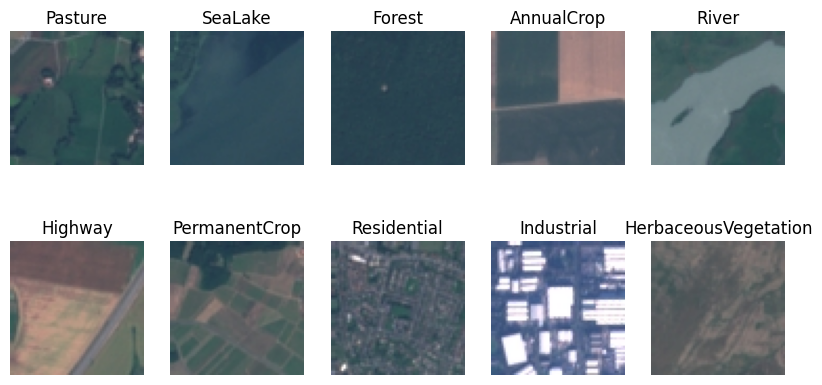

In [ ]:
class_name_list = np.array(list(training_set.class_indices.keys()))
labels, count = np.unique(training_set.classes, return_counts=True)
#image size and stuff
figure_height = 2
figure_width = 5
figure_size = (10, 5)
images, class_ids = next(training_set)
plt.figure(figsize=figure_size)
already_used_labels = []

imgs_to_plot = []
labels_to_plot = []
print(images)

# An image from each class!!!

while len(imgs_to_plot) < 9:
    for idx in range(len(images)):
        if class_name_list[class_ids[idx].astype(bool)][0] in already_used_labels:
            pass
        else:
            imgs_to_plot.append(images[idx])
            labels_to_plot.append(class_name_list[class_ids[idx].astype(bool)][0])
            already_used_labels.append(class_name_list[class_ids[idx].astype(bool)][0])

for index in range(figure_height * figure_width):
    plt.subplot(figure_height, figure_width, index + 1)
    plt.imshow(imgs_to_plot[index])
    plt.title(labels_to_plot[index])
    plt.axis("off")

plt.savefig("/content/images_examples.png") #Saving cz...welll...juuuust in case!!!

In [ ]:
#Really simple and dumb model to begin with lets see how far it takes us
#4 Conv. Layers(32,64,128,128 kernels of 3x3) ->Flatten->Dense->Dropout->Dense(10) cz 10 classes
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)), #rectified linear unit (aka be positive)
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') #softmax layer -> e**x/Sigma(e**x)
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4), # Tested, low enough because anything high creaated problems, ofc can't afford anything below this due to GPU!!!
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_path = "/content/eurosat_simple_cnn_model.h5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", save_best_only=True) #best saved
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5) #Learning rate reduces when plateau(ofc)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1) #It is what it is
callback_list = [checkpoint, early_stopping, reduce_lr]

In [ ]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    callbacks=callback_list,
    epochs=30,
    verbose=1,)  #30 epoch cz colab allowed me

Epoch 1/30
296/296 [==============================] - 157s 523ms/step - loss: 1.8040 - accuracy: 0.2958 - val_loss: 1.3806 - val_accuracy: 0.4819 - lr: 1.0000e-04
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


296/296 [==============================] - 143s 482ms/step - loss: 1.3369 - accuracy: 0.4674 - val_loss: 1.1863 - val_accuracy: 0.5906 - lr: 1.0000e-04
Epoch 3/30
296/296 [==============================] - 145s 490ms/step - loss: 1.1717 - accuracy: 0.5626 - val_loss: 1.0435 - val_accuracy: 0.6094 - lr: 1.0000e-04
Epoch 4/30
296/296 [==============================] - 162s 549ms/step - loss: 1.0331 - accuracy: 0.6268 - val_loss: 0.9063 - val_accuracy: 0.6878 - lr: 1.0000e-04
Epoch 5/30
296/296 [==============================] - 152s 515ms/step - loss: 0.9460 - accuracy: 0.6628 - val_loss: 0.8683 - val_accuracy: 0.6804 - lr: 1.0000e-04
Epoch 6/30
296/296 [==============================] - 140s 473ms/step - loss: 0.9086 - accuracy: 0.6698 - val_loss: 0.8243 - val_accuracy: 0.7067 - lr: 1.0000e-04
Epoch 7/30
296/296 [==============================] - 142s 481ms/step - loss: 0.8573 - accuracy: 0.6921 - val_loss: 0.8276 - val_accuracy: 0.7011 - lr: 1.0000e-04
Epoch 8/30
296/296 [=============

In [ ]:
plt.figure(figsize=(18, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()

plt.show()
plt.savefig("/content/eurosat_simple_cnn_accuracy_loss.png")

In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=1)
print("Test Loss:", loss, "\nTest Accuracy:", accuracy)

Not bad for that kind of a network at all!!!!

Lets Reduce Batch Size

In [ ]:
#making everything equal!!!!!!
image_height, image_width = 64, 64
batch_size = 32 # reduced batch size
train_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_generator = ImageDataGenerator(rescale=1./255)
print("Building training set...")
training_set = train_generator.flow_from_dataframe(
    dataframe=training_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

print("\nBuilding validation set...")
validation_set = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

print("\nBuilding test set...")
test_set = validation_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


In [ ]:
#Exactly same
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_path = "/content/eurosat_simple_cnn_model_batch_32.h5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)
callback_list = [checkpoint, early_stopping, reduce_lr]
history = model.fit(
    training_set,
    validation_data=validation_set,
    callbacks=callback_list,
    epochs=30,
    verbose=1)

In [ ]:
plt.figure(figsize=(18, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()

plt.show()
plt.savefig("/content/eurosat_simple_cnn_accuracy_loss.png")

In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=1)
print("Test Loss:", loss, "\nTest Accuracy:", accuracy)

GOT BETTER!!!

In [ ]:
image_height, image_width = 64, 64
batch_size = 64 # Again Experimental stuff weellll...cz hyperparameter
train_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_generator = ImageDataGenerator(rescale=1./255)
print("Building training set...")
training_set = train_generator.flow_from_dataframe(
    dataframe=training_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

print("\nBuilding validation set...")
validation_set = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

print("\nBuilding test set...")
test_set = validation_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col="class_name",
    directory=dataset_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


In [ ]:
#Say Hello to VGG-Visual Geometry Group, A CNN for simple and effective image classification developed in 2014 by Oxford
base_vgg16 = VGG16(include_top=False,
                   weights=None, #lets go random!!!!!!!
                   input_tensor=None,
                   input_shape=(64, 64, 3),
                   pooling=None,
                   classes=10,
                   classifier_activation='softmax')

In [ ]:
class_count = len(class_name_list) #How many classes there exist
print(tf.__version__)
model = Sequential()
model.add(base_vgg16)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(class_count, activation="softmax"))
#Let us see how it looks now
model.summary()

In [ ]:
model_path = "/content/eurosat_rgb_vgg16_model_no_weights.h5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5)
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=True)
callback_list = [checkpoint, early_stopping, reduce_lr]

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    callbacks=callback_list,
    epochs=25,
    verbose=1,
)

In [ ]:
plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.ylim(0, max(history.history["loss"] + history.history["val_loss"]) *0.7)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()
plt.savefig("/content/vgg16_no_weights_loss_accuracy.png")


In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=1)
print("Test Loss:", loss, "\nTest Accuracy:", accuracy)

In [ ]:
base_vgg16 = VGG16(include_top=False,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=(64, 64, 3),
                   pooling=None,
                   classes=10,
                   classifier_activation='softmax')

In [ ]:
class_count = len(class_name_list)
print(tf.__version__)
model = Sequential()
model.add(base_vgg16)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(class_count, activation="softmax"))
#Let us see how it looks now
model.summary()

In [ ]:
model_path = "/content/eurosat_rgb_vgg16_model_original.h5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5)
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=True)
callback_list = [checkpoint, early_stopping, reduce_lr]

Wonderful!!!

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    callbacks=callback_list,
    epochs=30,
    verbose=1,
)

In [ ]:
plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.ylim(0, max(history.history["loss"] + history.history["val_loss"]) *0.7)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()
plt.savefig("/content/vgg16_original_loss_accuracy.png")


Weird!!! Significant Overfitting but great accuracy

In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=1)
print("Test Loss:", loss, "\nTest Accuracy:", accuracy)

In [ ]:
test_set.reset()
predicted_probabilities = model.predict(test_set, steps=test_set.n, verbose=1)
predicted_class_ids = np.argmax(predicted_probabilities, axis=1)
print(metrics.classification_report(test_set.labels, predicted_class_ids, digits=4))

In [ ]:
cf_matrix = confusion_matrix(test_set.labels, predicted_class_ids)
print(cf_matrix)
confusion_matrix_array = confusion_matrix(y_true=test_set.labels, y_pred=predicted_class_ids)
confusion_matrix_df = pd.DataFrame(
    data=confusion_matrix_array,
    index=class_name_list,
    columns=class_name_list
)

plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
sns.heatmap(confusion_matrix_df/np.sum(confusion_matrix_df), annot=True,
           cmap="Blues", annot_kws={"size": 9}, fmt='.2%')
plt.ylabel("Label")
plt.xlabel("Prediction")
plt.title("Confusion matrix for the test set. Percentages")
plt.show()
plt.savefig("/content/vgg19_exp1_confusion_percentages.png")

In [ ]:
#Find mis-judged images
results_df = pd.DataFrame(
    {
        "label": test_set.labels,
        "prediction": predicted_class_ids,
        "path": test_set.filepaths
    }
)
mistakes = results_df["label"] != results_df["prediction"]
mistakes_df = results_df[mistakes]

print(f"{len(mistakes_df)} wrong predictions out of {len(results_df)}")
mistaken_predictions = (class_name_list[pred] for pred in mistakes_df["prediction"])
mistaken_labels = (class_name_list[label] for label in mistakes_df["label"])
mistaken_images = (image.imread(path) for path in mistakes_df["path"])

figure_height = 3
figure_width = 5

figure_size = (18, 15)
plt.figure(figsize=figure_size)
for index in range(figure_height * figure_width):

    label = next(mistaken_predictions)
    prediction = next(mistaken_labels)
    picture = next(mistaken_images)

    plt.subplot(figure_height, figure_width, index + 1)
    plt.imshow(picture)
    plt.title(f"Label: {label} \nPrediction: {prediction}")
    plt.axis("off")

plt.savefig("/content/vgg19_mislabeled_results.png")

Let us add an L2 regularizer!!!! Lets tackle overfitting

In [ ]:
from keras.regularizers import l2

# VGG16 base model,We  have seen it before!!!
base_vgg16 = VGG16(include_top=False,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=(64, 64, 3),
                   pooling=None)

class_count = len(class_name_list)
model = Sequential()
model.add(base_vgg16)
model.add(Flatten())
model.add(Dropout(0.5))

# L2 regularization
model.add(Dense(units=512, activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=l2(0.01)))  # L2 regularization with weight decay
model.add(Dense(class_count, activation="softmax"))
model_path = "/content/eurosat_rgb_vgg16_model_regularized.h5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5)
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=True)
callback_list = [checkpoint, early_stopping, reduce_lr]
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])
history = model.fit(
    training_set,
    validation_data=validation_set,
    callbacks=callback_list,
    epochs=20,
    verbose=1,
)


In [ ]:
plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.ylim(0, max(history.history["loss"] + history.history["val_loss"]) *0.7)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()
plt.savefig("/content/vgg19_original_loss_accuracy.png")


Better than before, not much overfitting

In [ ]:
plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.ylim(0, max(history.history["loss"] + history.history["val_loss"]) *0.7)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.ylim(0.5, 1)

plt.tight_layout()
plt.show()
plt.savefig("/content/vgg19_original_loss_accuracy.png")


In [ ]:
test_set.reset()
predicted_probabilities = model.predict(test_set, steps=test_set.n, verbose=1)
predicted_class_ids = np.argmax(predicted_probabilities, axis=1)
print(metrics.classification_report(test_set.labels, predicted_class_ids, digits=4))

In [ ]:
cf_matrix = confusion_matrix(test_set.labels, predicted_class_ids)
print(cf_matrix)
confusion_matrix_array = confusion_matrix(y_true=test_set.labels, y_pred=predicted_class_ids)
confusion_matrix_df = pd.DataFrame(
    data=confusion_matrix_array,
    index=class_name_list,
    columns=class_name_list
)

plt.figure(figsize=(10, 7))
sns.set(font_scale=1)
sns.heatmap(confusion_matrix_df/np.sum(confusion_matrix_df), annot=True,
           cmap="Blues", annot_kws={"size": 9}, fmt='.2%')
plt.ylabel("Label")
plt.xlabel("Prediction")
plt.title("Confusion matrix for the test set. Percentages")
plt.show()
plt.savefig("/content/vgg19_regularized_exp1_confusion_percentages.png")

In [ ]:
results_df = pd.DataFrame(
    {
        "label": test_set.labels,
        "prediction": predicted_class_ids,
        "path": test_set.filepaths
    }
)
mistakes = results_df["label"] != results_df["prediction"]
mistakes_df = results_df[mistakes]

print(f"{len(mistakes_df)} wrong predictions out of {len(results_df)}")
mistaken_predictions = (class_name_list[pred] for pred in mistakes_df["prediction"])
mistaken_labels = (class_name_list[label] for label in mistakes_df["label"])
mistaken_images = (image.imread(path) for path in mistakes_df["path"])

figure_height = 3
figure_width = 5

figure_size = (18, 15)
plt.figure(figsize=figure_size)
for index in range(figure_height * figure_width):

    label = next(mistaken_predictions)
    prediction = next(mistaken_labels)
    picture = next(mistaken_images)

    plt.subplot(figure_height, figure_width, index + 1)
    plt.imshow(picture)
    plt.title(f"Label: {label} \nPrediction: {prediction}")
    plt.axis("off")

plt.savefig("/content/vgg19_regularized_mislabeled_results.png")

In [ ]:
#Checking if we can load model, this stuff gave a lot of pain earlier with tf 17 implementation
model_path = "/content/eurosat_rgb_vgg16_model_original.h5"
load_model(model_path)

Works Finally!!!

VGG19!!

In [ ]:
#Let us try VGG19, a slightly more advanced model
base_vgg19 = VGG19(include_top=False,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=(64, 64, 3),
                   pooling=None,
                   classes=10,
                   classifier_activation='softmax')


In [ ]:
class_count = len(class_name_list)
model = Sequential()
model.add(base_vgg19)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(class_count, activation="softmax"))

In [ ]:
model_path = "/content/eurosat_rgb_vgg19_model.h5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=True)

callback_list = [checkpoint, early_stopping, reduce_lr]

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

In [ ]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    callbacks=callback_list,
    epochs=30,
    verbose=1,
)

In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=1)
print("Test Loss:", loss, "\nTest Accuracy:", accuracy)

Let us do some adversial testing, starting with an augmix like thingyy!!

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

test_images, test_labels = [], []
for _ in range(400):
    img, label = next(test_set)
    test_images.extend(img)
    test_labels.extend(label)

test_images, test_labels = np.array(test_images), np.array(test_labels)


augmenter = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Apply augmentation to the test images
augmented_images = np.array([augmenter.random_transform(img) for img in test_images])

# Evaluate the model on augmented test images
loss, accuracy = model.evaluate(augmented_images, test_labels, verbose=1)
print("Test Loss with Augmented Images:", loss, "\nTest Accuracy with Augmented Images:", accuracy)


Let us do smth better, Let us apply FGSM to prove adversial attacks work very well

In [ ]:
def fgsm_attack(image, epsilon, gradient):
    signed_grad = tf.sign(gradient)
    perturbed_image = image + epsilon * signed_grad
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)
    return perturbed_image
epsilon = 0.01
test_images, test_labels = [], []
for _ in range(200): #Lets restrict ourselves well cz GPU :'(
    img, label = next(test_set)
    test_images.extend(img)
    test_labels.extend(label)

test_images, test_labels = np.array(test_images), np.array(test_labels)
perturbed_images = []
for img in test_images:
    img_tensor = tf.convert_to_tensor(img.reshape(1, *img.shape))
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        prediction = model(img_tensor)
        loss = tf.keras.losses.categorical_crossentropy(test_labels[0].reshape(1, -1), prediction)
    gradient = tape.gradient(loss, img_tensor)

    # Applying FGSM attack!!!!!!!!!!!
    perturbed_img = fgsm_attack(img_tensor, epsilon, gradient)
    perturbed_images.append(perturbed_img.numpy().squeeze())

perturbed_images = np.array(perturbed_images)

loss, accuracy = model.evaluate(perturbed_images, test_labels, verbose=1)
print("Test Loss with FGSM-perturbed Images:", loss, "\nTest Accuracy with FGSM-perturbed Images:", accuracy)


Gets better for regularized model

In [ ]:

model_path = "/content/eurosat_rgb_vgg16_model_regularized.h5"
model = tf.keras.models.load_model(model_path)
def fgsm_attack(image, epsilon, gradient):
    signed_grad = tf.sign(gradient)
    perturbed_image = image + epsilon * signed_grad
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)
    return perturbed_image

epsilon = 0.01
test_images, test_labels = [], []
for _ in range(200):
    img, label = next(test_set)
    test_images.extend(img)
    test_labels.extend(label)

test_images, test_labels = np.array(test_images), np.array(test_labels)
perturbed_images = []

os.makedirs("/content/adversarial_images", exist_ok=True)
for idx, img in enumerate(test_images):
    img_tensor = tf.convert_to_tensor(img.reshape(1, *img.shape))
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        prediction = model(img_tensor)
        loss = tf.keras.losses.categorical_crossentropy(test_labels[0].reshape(1, -1), prediction)
    gradient = tape.gradient(loss, img_tensor)
    perturbed_img = fgsm_attack(img_tensor, epsilon, gradient)
    perturbed_images.append(perturbed_img.numpy().squeeze())
    plt.imsave(f"/content/adversarial_images/perturbed_image_{idx + 1}.png", perturbed_img.numpy().squeeze())
perturbed_images = np.array(perturbed_images)
loss, accuracy = model.evaluate(perturbed_images, test_labels, verbose=1)
print(f"Test Loss with FGSM-perturbed Images: {loss}\nTest Accuracy with FGSM-perturbed Images: {accuracy}")
def plot_images(images):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Perturbed {i + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_images(perturbed_images[:10])


In [ ]:
!pip install joblib
from joblib import dump
dump(model, 'model.joblib')

In [ ]:
from google.colab import files
import glob
import zipfile
import os

# Find all .h5 files in the root directory
h5_files = glob.glob('/content/*.h5')

# Print the size of each .h5 file
for file in h5_files:
    size = os.path.getsize(file)
    print(f"File: {file}, Size: {size / (1024 * 1024):.2f} MB")

# Create a zip file containing all .h5 files
with zipfile.ZipFile('h5_files.zip', 'w') as zipf:
    for file in h5_files:
        zipf.write(file)

# Download the zip file
files.download('h5_files.zip')